## PRETERM INFANT CHRONIC LUNG DISEASE PREDICTIONS BASED ON BREASTMILK METABOLOME

### Your Name: Danyellé (Dany) Thorpe
### Your TF: Alan Xie
### CSCI E-29 GRADUATE PROJECT


### Abstract
The Martin-Freedman lab conducts research to imporve premature baby (preemie) outcomes. This particular research data that I will be working on focuses on metabolome of breast milk fed to premature infants (preemies). This dataset has been scrubbed of any identifying information. This data is not for public consumption and is only availbale to CSCI E-29 for this project.

#### How the breastmilk data was collected:
On days 14 and 28 after birth, preemies' mothers' breast milk was sampled and analyzed to measure the amount of ~450 different metabolites present in the milk. There were 73 samples measured on day 14 and 67 measured on day 28 for a total of 140 samples included in this subset of data. Each preemie was followed until 36 weeks post-menstrual age and observed for common illnesses and syndromes correlated by a premature birth. For the sake of the scope of this project and the prevalence of lung disease among preemies, I will only focus on whether the preemie develops chronic lung disease.

#### My project:
Using the data provided by the Martin-Freedman lab, I will engage machine learning to explore if there is a metabolomic significance of maternal breast milk in relation to the preemie's risk of neonatal lung disease. The features will be the ~450 metabolites measured for in the breast milk and the predicted results will be whether or not the preemie develops chronic lung disease. This project engages machine learning to input the metabolites of the breast milk and predict if the preemie will need respiratory support 36 weeks post-menstrual age (an indication if they have developed chronic lung disease.



In [19]:
#import libraries

#imports for dataset analysis
import pandas as pd
import numpy as np

#imports for visualizing data
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#imports for shaping data for machine learning
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#imports for ensemble machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#import for PCA
from sklearn.decomposition import PCA

In [20]:
#Upload data and set the first column (Parent Sample ID as index)
#set the limit of rows to upload so as to not load lots of blank rows
breastmilk = pd.read_csv('BreastMilk.csv', nrows = 142, index_col = 0)

#check to see what the shape of the dataset is with no edits
print("The shape of the dataset is:", breastmilk.shape)

The shape of the dataset is: (142, 480)


In [21]:
#clean the data by dropping any rows and columns that are all NaN
breastmilk.dropna(axis = 0, how = 'all', inplace = True)
breastmilk.dropna(axis = 1, how = 'all', inplace = True)

#check to see what the shape of the dataset is now
print("The shape of the dataset after dropping rows and columns is now:", breastmilk.shape)

#confirm that all columns are unique and no overlapping data headers
print("Should we expect that the columns reflect unique data?:", breastmilk.columns.is_unique)
print("Should we expect that each row corresponds with a unique breast milk sample?:", breastmilk.index.is_unique)

The shape of the dataset after dropping rows and columns is now: (140, 479)
Should we expect that the columns reflect unique data?: True
Should we expect that each row corresponds with a unique breast milk sample?: True


In [22]:
#let's see what we have in our data by looking at the first 5 rows
breastmilk.head()

COMMENT TIME DAY GENDER  BWEIGHT  M AGE     GA  CLD  \
PARENT SAMPLE ID                                                            
4950327.0         Breast milk      D14      F    630.0   28.0  27.43  1.0   
4950328.0         Breast milk      D14      M    770.0   30.0  27.14  0.0   
4950329.0         Breast milk      D14      M    970.0   26.0  27.86  1.0   
4950330.0         Breast milk      D14      F    780.0   27.0  24.86  0.0   
4950331.0         Breast milk      D14      M    750.0   32.0  24.43  1.0   

                  COHORT EPOCH  COMPOSITE ILLNESS SCORE  D14GV GT10 ...   \
PARENT SAMPLE ID                                                    ...    
4950327.0                  1.0                      3.0         1.0 ...    
4950328.0                  1.0                      2.0         0.0 ...    
4950329.0                  1.0                      2.0         0.0 ...    
4950330.0                  1.0                      0.0         0.0 ...    
4950331.0                  1.0                      2.0         0.0 ...    

                       850        704         926       929      733  \
PARENT SAMPLE ID                                                       
4950327.0              NaN        NaN   896249.06       NaN      NaN   
4950328.0              NaN        NaN   866904.00       NaN      NaN   
4950329.0              NaN        NaN  1561668.00       NaN      NaN   
4950330.0         447784.0  2703689.0   713239.00  301326.0  74616.0   
4950331.0              NaN        NaN  1424277.00   32664.0      NaN   

                        737       794       820       836  840  
PARENT SAMPLE ID                                                
4950327.0               NaN       NaN       NaN       NaN  NaN  
4950328.0               NaN       NaN       NaN       NaN  NaN  
4950329.0               NaN       NaN       NaN       NaN  NaN  
4950330.0         2849712.0  121816.0  262870.0  174024.0  NaN  
4950331.0               NaN       NaN       NaN       NaN  NaN  

[5 rows x 479 columns]

In [23]:
#let's set the index as an integer instead of a float
breastmilk.index = breastmilk.index.astype(int)
breastmilk.head()

COMMENT TIME DAY GENDER  BWEIGHT  M AGE     GA  CLD  \
PARENT SAMPLE ID                                                            
4950327           Breast milk      D14      F    630.0   28.0  27.43  1.0   
4950328           Breast milk      D14      M    770.0   30.0  27.14  0.0   
4950329           Breast milk      D14      M    970.0   26.0  27.86  1.0   
4950330           Breast milk      D14      F    780.0   27.0  24.86  0.0   
4950331           Breast milk      D14      M    750.0   32.0  24.43  1.0   

                  COHORT EPOCH  COMPOSITE ILLNESS SCORE  D14GV GT10 ...   \
PARENT SAMPLE ID                                                    ...    
4950327                    1.0                      3.0         1.0 ...    
4950328                    1.0                      2.0         0.0 ...    
4950329                    1.0                      2.0         0.0 ...    
4950330                    1.0                      0.0         0.0 ...    
4950331                    1.0                      2.0         0.0 ...    

                       850        704         926       929      733  \
PARENT SAMPLE ID                                                       
4950327                NaN        NaN   896249.06       NaN      NaN   
4950328                NaN        NaN   866904.00       NaN      NaN   
4950329                NaN        NaN  1561668.00       NaN      NaN   
4950330           447784.0  2703689.0   713239.00  301326.0  74616.0   
4950331                NaN        NaN  1424277.00   32664.0      NaN   

                        737       794       820       836  840  
PARENT SAMPLE ID                                                
4950327                 NaN       NaN       NaN       NaN  NaN  
4950328                 NaN       NaN       NaN       NaN  NaN  
4950329                 NaN       NaN       NaN       NaN  NaN  
4950330           2849712.0  121816.0  262870.0  174024.0  NaN  
4950331                 NaN       NaN       NaN       NaN  NaN  

[5 rows x 479 columns]

In [24]:
#let's get a clearer idea of what the columns are measures of
print(list(breastmilk.columns))

['COMMENT', 'TIME DAY', 'GENDER', 'BWEIGHT', 'M AGE', 'GA', 'CLD', 'COHORT EPOCH', 'COMPOSITE ILLNESS SCORE', 'D14GV GT10', 'D14 BM CAT', 'D14 ENT CAT', 'D28GV GT10', 'D28 BM CAT', 'D28 ENT CAT', 'FEEDING CHG', 'MORTALITY', 'NEC', 'ROP', 'SEPSIS', 'SEX', 'ORIG ORDER', 'RUN DAY', 'GROUP NAME', 'PATHWAY SORTORDER', '436', '139', '83', '105', '454', '303', '379', '150', '328', '254', '323', '300', '283', '67', '434', '439', '47', '147', '265', '429', '451', '425', '28', '301', '371', '372', '38', '34', '53', '280', '6', '115', '217', '380', '411', '413', '412', '450', '351', '356', '449', '357', '386', '5', '311', '183', '41', '42', '1', '410', '65', '381', '40', '363', '76', '74', '326', '296', '273', '225', '221', '261', '92', '332', '336', '337', '119', '101', '30', '387', '35', '44', '68', '333', '430', '10', '17', '392', '227', '334', '402', '375', '180', '154', '120', '126', '125', '113', '383', '51', '343', '342', '9', '353', '354', '421', '426', '364', '16', '306', '397', '72', '2

In [25]:
#drop all columns except for the metabolites, when they were measured
#and if the preemie developed CLD
breastmilk.drop(['COMMENT','BWEIGHT', 'GENDER', 'M AGE', 'GA', 'COHORT EPOCH', 'COMPOSITE ILLNESS SCORE', 
                 'D14GV GT10', 'D14 BM CAT', 'D14 ENT CAT', 'D28GV GT10', 'D28 BM CAT', 
                 'D28 ENT CAT', 'FEEDING CHG', 'MORTALITY', 'NEC', 'ROP', 'SEPSIS', 'SEX', 
                 'ORIG ORDER', 'RUN DAY', 'GROUP NAME', 'PATHWAY SORTORDER'], axis = 1, 
                inplace = True)


In [26]:
#view the first 5 rows and list of columns again to see the change reflected in the dataset
display(breastmilk.head())
print(list(breastmilk.columns))

TIME DAY  CLD       436       139         83         105  \
PARENT SAMPLE ID                                                            
4950327               D14  1.0       NaN   63626.0  157036.00   197812.00   
4950328               D14  0.0       NaN       NaN  168703.02   908066.00   
4950329               D14  1.0       NaN       NaN  113970.00   128389.00   
4950330               D14  0.0       NaN  147034.0  174828.00   343469.03   
4950331               D14  1.0  118419.0       NaN  176145.00  1943261.00   

                         454         303        379        150 ...        850  \
PARENT SAMPLE ID                                               ...              
4950327            8891925.0    690998.0        NaN   860101.0 ...        NaN   
4950328            5130660.0   2926822.0  198251.98   985574.0 ...        NaN   
4950329            5937815.0     95036.0  321323.00   660605.0 ...        NaN   
4950330            5546728.5   3890198.0  180928.00   732923.0 ...   447784.0   
4950331           11499422.0  17594440.0  317927.00  1087537.0 ...        NaN   

                        704         926       929      733        737  \
PARENT SAMPLE ID                                                        
4950327                 NaN   896249.06       NaN      NaN        NaN   
4950328                 NaN   866904.00       NaN      NaN        NaN   
4950329                 NaN  1561668.00       NaN      NaN        NaN   
4950330           2703689.0   713239.00  301326.0  74616.0  2849712.0   
4950331                 NaN  1424277.00   32664.0      NaN        NaN   

                       794       820       836  840  
PARENT SAMPLE ID                                     
4950327                NaN       NaN       NaN  NaN  
4950328                NaN       NaN       NaN  NaN  
4950329                NaN       NaN       NaN  NaN  
4950330           121816.0  262870.0  174024.0  NaN  
4950331                NaN       NaN       NaN  NaN  

[5 rows x 456 columns]

['TIME DAY', 'CLD', '436', '139', '83', '105', '454', '303', '379', '150', '328', '254', '323', '300', '283', '67', '434', '439', '47', '147', '265', '429', '451', '425', '28', '301', '371', '372', '38', '34', '53', '280', '6', '115', '217', '380', '411', '413', '412', '450', '351', '356', '449', '357', '386', '5', '311', '183', '41', '42', '1', '410', '65', '381', '40', '363', '76', '74', '326', '296', '273', '225', '221', '261', '92', '332', '336', '337', '119', '101', '30', '387', '35', '44', '68', '333', '430', '10', '17', '392', '227', '334', '402', '375', '180', '154', '120', '126', '125', '113', '383', '51', '343', '342', '9', '353', '354', '421', '426', '364', '16', '306', '397', '72', '210', '219', '143', '137', '373', '318', '231', '1175', '1154', '1158', '1152', '1162', '1156', '1157', '1163', '1177', '1161', '1160', '1323', '1326', '1330', '2336', '2314', '2306', '2315', '2303', '2302', '2304', '2334', '2319', '2311', '2310', '2338', '1904', '2275', '1895', '1975', '1819', 

In [27]:
#assuming that the metabolites are present just not picked up in measurement,
#set all NaN to the minimum observed measurement of the metabolite of that column
breastmilk = breastmilk.apply(lambda column: column.fillna(column.min()))

#all NaN should be filled
print("Are there any more NaNs in this data set?:", breastmilk.isnull().any().any())

Are there any more NaNs in this data set?: False


In [28]:
#now let's get the TIME DAY information encoded for machine learning later on

#instantiate the encoder & fit transform the time day column
le_generation = LabelEncoder()
labels_collectionday = le_generation.fit_transform(breastmilk['TIME DAY'])

#add a new column to the dataframe with encoded information
breastmilk['DAY'] = labels_collectionday

#viewing the first and last 5 rows shows that Day14 is 0 and Day28 is 1
display(breastmilk.head())
display(breastmilk.tail())

TIME DAY  CLD       436       139         83         105  \
PARENT SAMPLE ID                                                            
4950327               D14  1.0   34423.0   63626.0  157036.00   197812.00   
4950328               D14  0.0   34423.0   21754.0  168703.02   908066.00   
4950329               D14  1.0   34423.0   21754.0  113970.00   128389.00   
4950330               D14  0.0   34423.0  147034.0  174828.00   343469.03   
4950331               D14  1.0  118419.0   21754.0  176145.00  1943261.00   

                         454         303        379        150 ...   \
PARENT SAMPLE ID                                               ...    
4950327            8891925.0    690998.0   10989.00   860101.0 ...    
4950328            5130660.0   2926822.0  198251.98   985574.0 ...    
4950329            5937815.0     95036.0  321323.00   660605.0 ...    
4950330            5546728.5   3890198.0  180928.00   732923.0 ...    
4950331           11499422.0  17594440.0  317927.00  1087537.0 ...    

                        704         926       929      733        737  \
PARENT SAMPLE ID                                                        
4950327             69147.0   896249.06   21613.0  26280.0    30542.0   
4950328             69147.0   866904.00   21613.0  26280.0    30542.0   
4950329             69147.0  1561668.00   21613.0  26280.0    30542.0   
4950330           2703689.0   713239.00  301326.0  74616.0  2849712.0   
4950331             69147.0  1424277.00   32664.0  26280.0    30542.0   

                       794       820       836      840  DAY  
PARENT SAMPLE ID                                              
4950327            52037.0   37081.0   48751.0  53077.0    0  
4950328            52037.0   37081.0   48751.0  53077.0    0  
4950329            52037.0   37081.0   48751.0  53077.0    0  
4950330           121816.0  262870.0  174024.0  53077.0    0  
4950331            52037.0   37081.0   48751.0  53077.0    0  

[5 rows x 457 columns]

TIME DAY  CLD       436        139        83        105  \
PARENT SAMPLE ID                                                           
4950462               D28  0.0  213964.0  3039078.0  153537.0   237004.0   
4950463               D28  0.0  144116.0   404134.0  185035.0   820766.0   
4950464               D28  1.0   60348.0   142514.0  145615.0   292039.0   
4950465               D28  1.0   34423.0    52770.0   99914.0  2161491.0   
4950466               D28  1.0  781287.0   105354.0  147044.0  1419867.0   

                        454        303        379         150 ...   \
PARENT SAMPLE ID                                              ...    
4950462           3682062.0  1533479.0  125033.00   434831.03 ...    
4950463           7411960.0   982961.0   10989.00   384006.00 ...    
4950464           6067705.5   741079.0   10989.00   489395.00 ...    
4950465           5043885.0   366661.0   10989.00   253211.00 ...    
4950466           6681704.0  2992075.5  397574.97  2550508.00 ...    

                         704        926       929        733       737  \
PARENT SAMPLE ID                                                         
4950462           20843510.0  1296013.0  159619.0  2123715.0  693136.0   
4950463            8196155.5   648060.0  272579.0   304468.0  720699.0   
4950464            4721382.0   233653.0  118060.0    63279.0  528997.0   
4950465              69147.0   400685.0   21613.0    26280.0   30542.0   
4950466           74674000.0  2194986.0  137141.0  2203419.0  438244.0   

                         794       820         836          840  DAY  
PARENT SAMPLE ID                                                      
4950462           18093756.0  103986.0   6536088.0   51761572.0    1  
4950463             684228.0   37081.0    642296.0     290530.0    1  
4950464             183491.0   69313.0     48751.0      53077.0    1  
4950465              52037.0   37081.0     48751.0      53077.0    1  
4950466           85069712.0  288472.0  34794020.0  362616928.0    1  

[5 rows x 457 columns]

In [29]:
#OK, now that we have a more complete dataset, let's see what some of the basic statistics look like:
breastmilk.describe()

CLD           436           139             83           105  \
count  140.000000  1.400000e+02  1.400000e+02     140.000000  1.400000e+02   
mean     0.635714  1.789838e+05  3.171110e+05  132549.178286  9.205487e+05   
std      0.482957  2.869449e+05  5.591063e+05   51748.073996  1.055022e+06   
min      0.000000  3.442300e+04  2.175400e+04   21925.000000  9.798100e+04   
25%      0.000000  3.442300e+04  2.175400e+04   98293.500000  3.432120e+05   
50%      1.000000  6.896300e+04  1.105815e+05  131792.500000  6.015925e+05   
75%      1.000000  2.000785e+05  3.238798e+05  167944.755000  1.009380e+06   
max      1.000000  2.153040e+06  3.940494e+06  281115.000000  8.373199e+06   

                454           303           379           150           328  \
count  1.400000e+02  1.400000e+02  1.400000e+02  1.400000e+02  1.400000e+02   
mean   5.952839e+06  2.481403e+06  1.761936e+05  9.121634e+05  6.443233e+05   
std    2.773300e+06  3.386096e+06  3.836514e+05  6.587373e+05  3.948237e+05   
min    5.051980e+05  4.750500e+04  1.098900e+04  2.384480e+05  2.996580e+05   
25%    4.231418e+06  6.870832e+05  1.098900e+04  5.377165e+05  2.996580e+05   
50%    5.375007e+06  1.495784e+06  1.098900e+04  7.379620e+05  5.799720e+05   
75%    6.829904e+06  2.935030e+06  1.604230e+05  1.030158e+06  8.338858e+05   
max    1.749078e+07  3.015242e+07  2.589515e+06  4.657167e+06  2.154277e+06   

          ...               704           926           929           733  \
count     ...      1.400000e+02  1.400000e+02  1.400000e+02  1.400000e+02   
mean      ...      2.911682e+06  1.027934e+06  7.519185e+05  1.389896e+05   
std       ...      7.250157e+06  9.455660e+05  2.562808e+06  2.931152e+05   
min       ...      6.914700e+04  1.897170e+05  2.161300e+04  2.628000e+04   
25%       ...      6.914700e+04  3.805070e+05  2.161300e+04  2.628000e+04   
50%       ...      6.914700e+04  7.285765e+05  2.056445e+05  2.628000e+04   
75%       ...      3.411020e+06  1.222168e+06  3.473602e+05  1.321020e+05   
max       ...      7.467400e+07  4.402815e+06  1.738789e+07  2.203419e+06   

                737           794           820           836           840  \
count  1.400000e+02  1.400000e+02  1.400000e+02  1.400000e+02  1.400000e+02   
mean   7.411500e+05  1.131013e+06  1.639113e+05  8.117058e+05  3.431979e+06   
std    8.977827e+05  7.402118e+06  2.163587e+05  3.965732e+06  3.100226e+07   
min    3.054200e+04  5.203700e+04  3.708100e+04  4.875100e+04  5.307700e+04   
25%    3.054200e+04  5.203700e+04  3.708100e+04  4.875100e+04  5.307700e+04   
50%    4.736880e+05  1.245350e+05  8.460100e+04  4.875100e+04  5.307700e+04   
75%    1.100043e+06  3.528338e+05  1.795935e+05  2.070410e+05  1.946277e+05   
max    4.823152e+06  8.506971e+07  1.157431e+06  3.479402e+07  3.626169e+08   

              DAY  
count  140.000000  
mean     0.478571  
std      0.501334  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000  

[8 rows x 456 columns]

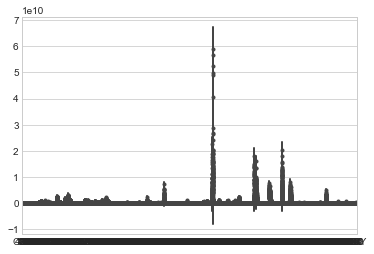

In [30]:
#let's visualize this to get an idea of the scale of the measurements
sns.set_style('whitegrid')
fig, ax = plt.subplots()
sns.violinplot(data=breastmilk, inner="points", ax=ax)

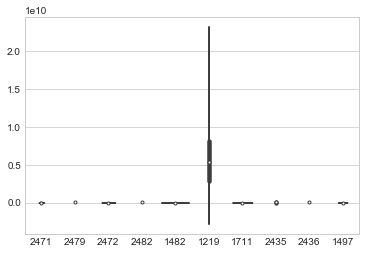

In [31]:
#a more zoomed in view
#Conclusion: the data needs to be scaled!
sns.violinplot (data = breastmilk[[ '2471', '2479', '2472', '2482', '1482', '1219', '1711', '2435', '2436', '1497']])

In [32]:
#let's split the data from the label so we can scale it
data = breastmilk.drop(["TIME DAY", "CLD", "DAY"], axis = 1)
label = breastmilk.CLD

display("data:", data.head())
display("label:", label.head())

'data:'

436       139         83         105         454  \
PARENT SAMPLE ID                                                          
4950327            34423.0   63626.0  157036.00   197812.00   8891925.0   
4950328            34423.0   21754.0  168703.02   908066.00   5130660.0   
4950329            34423.0   21754.0  113970.00   128389.00   5937815.0   
4950330            34423.0  147034.0  174828.00   343469.03   5546728.5   
4950331           118419.0   21754.0  176145.00  1943261.00  11499422.0   

                         303        379        150         328         254  \
PARENT SAMPLE ID                                                             
4950327             690998.0   10989.00   860101.0   580167.00   619005.00   
4950328            2926822.0  198251.98   985574.0   932695.00   870804.00   
4950329              95036.0  321323.00   660605.0   299658.00  1964795.00   
4950330            3890198.0  180928.00   732923.0   740442.94   563321.00   
4950331           17594440.0  317927.00  1087537.0  1123624.00  1021454.06   

                   ...          850        704         926       929      733  \
PARENT SAMPLE ID   ...                                                          
4950327            ...      55820.0    69147.0   896249.06   21613.0  26280.0   
4950328            ...      55820.0    69147.0   866904.00   21613.0  26280.0   
4950329            ...      55820.0    69147.0  1561668.00   21613.0  26280.0   
4950330            ...     447784.0  2703689.0   713239.00  301326.0  74616.0   
4950331            ...      55820.0    69147.0  1424277.00   32664.0  26280.0   

                        737       794       820       836      840  
PARENT SAMPLE ID                                                    
4950327             30542.0   52037.0   37081.0   48751.0  53077.0  
4950328             30542.0   52037.0   37081.0   48751.0  53077.0  
4950329             30542.0   52037.0   37081.0   48751.0  53077.0  
4950330           2849712.0  121816.0  262870.0  174024.0  53077.0  
4950331             30542.0   52037.0   37081.0   48751.0  53077.0  

[5 rows x 454 columns]

'label:'

PARENT SAMPLE ID
4950327    1.0
4950328    0.0
4950329    1.0
4950330    0.0
4950331    1.0
Name: CLD, dtype: float64

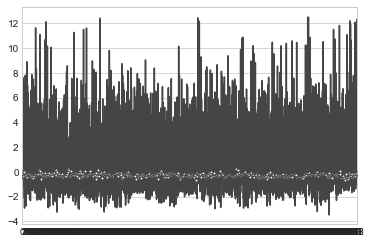

In [33]:
#Now let's scale the data and see the new violin plot
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

sns.violinplot(data=scaled_data)

In [34]:
#Employ ensemble learning via soft voting classifier

#Tried Perceptron, logistic regression

#split training and testing data
X_train, X_test, y_train, y_test = train_test_split(scaled_data, label, train_size = .7, test_size = .3, stratify = label)

#initiate classifiers and add to the voting classifier
rnd_clf = RandomForestClassifier(max_features = 'auto', max_depth = 2)
svm_clf = SVC(probability = True, max_iter = -1)
sgd_clf = SGDClassifier(loss = 'log', eta0=1, learning_rate="optimal", max_iter = 300)

voting_clf = VotingClassifier(estimators = [
                                        ('rnd',rnd_clf),
                                        ('svm',svm_clf),
                                           ('sgd', sgd_clf)],voting = 'soft')

#fit the data and view accuracy score and confusion matrix
voting_clf.fit(X_train,y_train)

voting_clf.score(X_test,y_test)
for clf in (sgd_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print (clf.__class__.__name__,accuracy_score(y_test, y_pred))  

SGDClassifier 0.666666666667
RandomForestClassifier 0.5
SVC 0.642857142857
VotingClassifier 0.642857142857


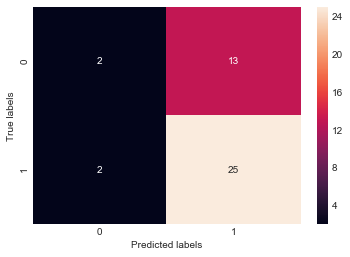

In [35]:
#visualize confusion matrix. our problem is with false positives.
predict = voting_clf.predict(X_test)
cm = confusion_matrix(y_test, predict, labels = [0,1])
ax = sns.heatmap(cm, annot = True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])
display(ax)

In [37]:
#perform Principal Component Analysis
pca = PCA(n_components = 454)
pca.fit(scaled_data)
print(pca.explained_variance_ratio_.max())
print(pca.explained_variance_ratio_)

0.20784378952
[  2.07843790e-01   1.12333527e-01   9.05842374e-02   7.39882169e-02
   4.02859078e-02   3.77808892e-02   3.39747272e-02   2.93468364e-02
   2.25904646e-02   2.01094599e-02   1.89586038e-02   1.59710094e-02
   1.50176614e-02   1.41859994e-02   1.25488350e-02   1.18452805e-02
   1.00589028e-02   9.56655428e-03   9.52929015e-03   9.06608301e-03
   8.15441653e-03   7.59767076e-03   7.31496340e-03   6.78005859e-03
   6.56194528e-03   6.16283814e-03   5.83165592e-03   5.71349988e-03
   5.61971336e-03   5.01237483e-03   4.70382333e-03   4.69702847e-03
   4.50099857e-03   4.30580862e-03   4.07314897e-03   3.99370068e-03
   3.80265522e-03   3.67565168e-03   3.60157126e-03   3.46917115e-03
   3.36864376e-03   3.22538860e-03   3.16000458e-03   3.07157352e-03
   2.87784151e-03   2.83734735e-03   2.74432591e-03   2.69142347e-03
   2.54591280e-03   2.48431956e-03   2.42292878e-03   2.36204336e-03
   2.27930138e-03   2.13285627e-03   2.06332614e-03   1.98766850e-03
   1.96056345e-03   

Text(0,0.5,'cumulative explained variance')

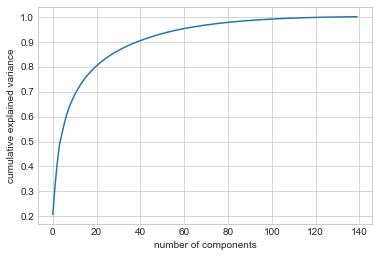

In [38]:
#let's see how many components are needed to explain the majority of the data
#reference: excerpt on PCA from Python Data Science Handbook by Jake VanderPlas 
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [39]:
#since only ~100 features are needed for almost 100% explained variance, 
#time to explore if the principle components are within the same pathways 
metabolites = pd.read_csv('Biochemicals.csv')

amino_acids = breastmilk[metabolites.loc[metabolites['SUPER PATHWAY']=='Amino Acid']['PATHWAY SORTORDER'].values.astype('int64').astype('str').tolist()]
energy = breastmilk[metabolites.loc[metabolites['SUPER PATHWAY']=='Energy']['PATHWAY SORTORDER'].values.astype('int64').astype('str').tolist()]
lipid = breastmilk[metabolites.loc[metabolites['SUPER PATHWAY']=='Lipid']['PATHWAY SORTORDER'].values.astype('int64').astype('str').tolist()]
peptide = breastmilk[metabolites.loc[metabolites['SUPER PATHWAY']=='Peptide']['PATHWAY SORTORDER'].values.astype('int64').astype('str').tolist()]

print('There are:', amino_acids.shape[1], 'amino acids metabolites;', energy.shape[1],'energy metabolites;', lipid.shape[1], 'lipid metabolites;','and', peptide.shape[1], 'peptide metabolites.',)

There are: 109 amino acids metabolites; 11 energy metabolites; 309 lipid metabolites; and 25 peptide metabolites.


In [40]:
#same voting ensemble learning but as a function
def analyze_pathway(data):
    scaled_data = scaler.fit_transform(data)
    X_train, X_test, y_train, y_test = train_test_split(scaled_data, label, train_size = .7, test_size = .3, stratify = label)

    #initiate classifiers and add to the voting classifier
    rnd_clf = RandomForestClassifier(max_features = 'auto', max_depth = 2)
    svm_clf = SVC(probability = True, max_iter = -1)
    sgd_clf = SGDClassifier(loss = 'log', eta0=1, learning_rate="optimal", max_iter = 300)

    voting_clf = VotingClassifier(estimators = [
                                            ('rnd',rnd_clf),
                                            ('svm',svm_clf),
                                               ('sgd', sgd_clf)],voting = 'soft')

    #fit the data and view accuracy score and confusion matrix
    voting_clf.fit(X_train,y_train)

    voting_clf.score(X_test,y_test)
    for clf in (sgd_clf, rnd_clf, svm_clf, voting_clf):
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        print (clf.__class__.__name__,accuracy_score(y_test, y_pred))
        
    predict = voting_clf.predict(X_test)
    cm = confusion_matrix(y_test, predict, labels = [0,1])
    ax = sns.heatmap(cm, annot = True)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.xaxis.set_ticklabels(['0', '1'])
    ax.yaxis.set_ticklabels(['0', '1'])
    display(ax)
    
    return

SGDClassifier 0.642857142857
RandomForestClassifier 0.619047619048
SVC 0.642857142857
VotingClassifier 0.595238095238


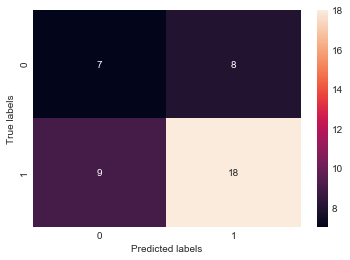

In [41]:
#analyze to see if amino acids contain the 100 PCAs 
#by only using amino acids in training machine learning
analyze_pathway(amino_acids)

SGDClassifier 0.690476190476
RandomForestClassifier 0.619047619048
SVC 0.642857142857
VotingClassifier 0.690476190476


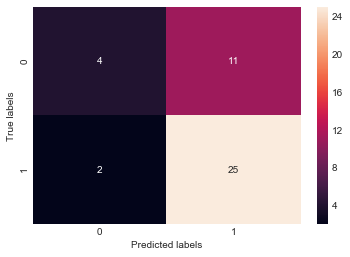

In [42]:
#analyze to see if lipid metabolites contain the 100 PCAs 
#by only using lipid metabolites  in training machine learning
analyze_pathway(lipid)

SGDClassifier 0.690476190476
RandomForestClassifier 0.619047619048
SVC 0.642857142857
VotingClassifier 0.619047619048


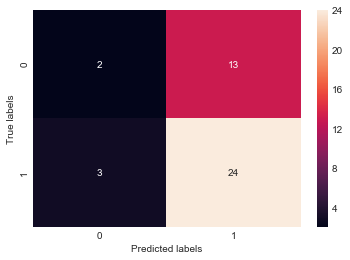

In [43]:
#for comparison, let's use all pathways again
allpathways = data.copy()
analyze_pathway(allpathways)